In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    precision_recall_curve, 
    roc_curve, 
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
file_path = "C:/Users/Sasha/ML_labs/l_3_2/Titanic.csv"  
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# п1.1
df_cleaned = df.dropna()
print("Размер после удаления строк с пропусками:", df_cleaned.shape)

Размер после удаления строк с пропусками: (183, 12)


In [4]:
# п1.2
columns_to_keep = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_cleaned = df_cleaned[columns_to_keep]
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [5]:
# п1.3
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
df_cleaned['Embarked'] = df_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
3,1,1,1,35.0,1,0,53.1000,3
6,0,1,0,54.0,0,0,51.8625,3
10,1,3,1,4.0,1,1,16.7000,3
11,1,1,1,58.0,0,0,26.5500,3


In [6]:
# п1.4
df_cleaned = df_cleaned.drop(columns=['PassengerId'], errors='ignore')

In [7]:
# п1.5
initial_len = len(df)
after_cleaning_len = len(df_cleaned)
loss_percent = ((initial_len - after_cleaning_len) / initial_len) * 100
print(f"Процент потерянных данных: {loss_percent:.2f}%")

Процент потерянных данных: 79.46%


In [8]:
########################################################################

In [9]:
# п2.1
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# п2.2
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# п2.3
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.6909


In [12]:
# п2.4
X_no_embarked = X.drop(columns=['Embarked'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_embarked, y, test_size=0.3, random_state=42)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)
accuracy_no_embarked = accuracy_score(y_test2, model2.predict(X_test2))
print(f"Точность без Embarked: {accuracy_no_embarked:.4f}")
print(f"Разница в точности: {accuracy - accuracy_no_embarked:.4f}")

Точность без Embarked: 0.6909
Разница в точности: 0.0000


In [13]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False)

Sex         2.456158
Fare        0.002865
Age        -0.024988
Embarked   -0.193544
SibSp      -0.222411
Parch      -0.397677
Pclass     -0.590557
dtype: float64

In [14]:
# Как мы видим, столбец Embarked не нёс необходимой для предсказания информации

In [15]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # для ROC и PR кривых

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.7812
Recall: 0.7143
F1 Score: 0.7463


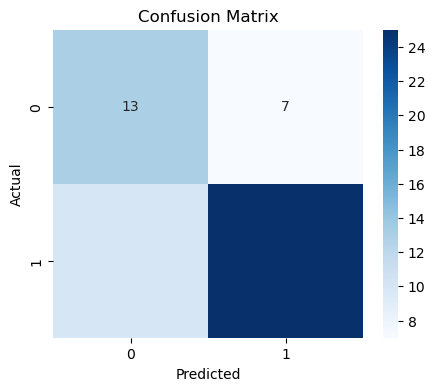

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

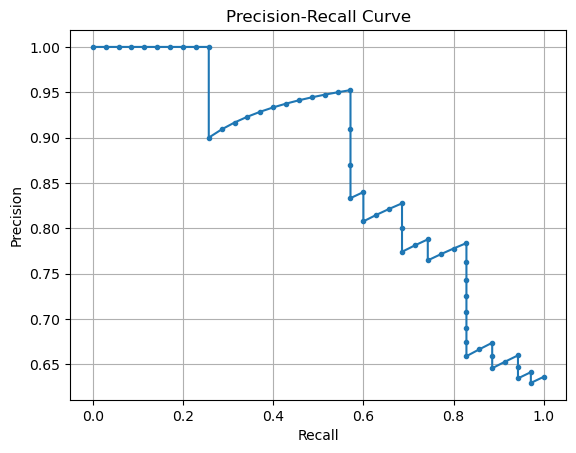

In [17]:
prec, rec, _ = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(rec, prec, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

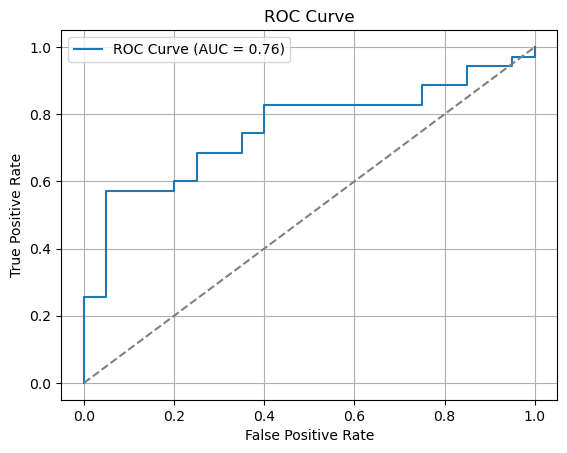

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Вывод: Модель логистической регрессии показывает, что у неё неплохая, но не очень высокая точность,
# что, например, можно увидеть по значению AUC (0.76).
#Можно попробовать улучшить результат с помощью других моделей.



=== SVM ===
Precision: 0.6364
Recall: 1.0000
F1 Score: 0.7778


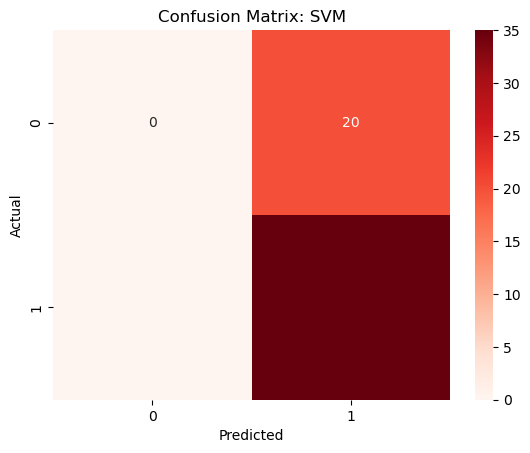


=== KNN ===
Precision: 0.6739
Recall: 0.8857
F1 Score: 0.7654


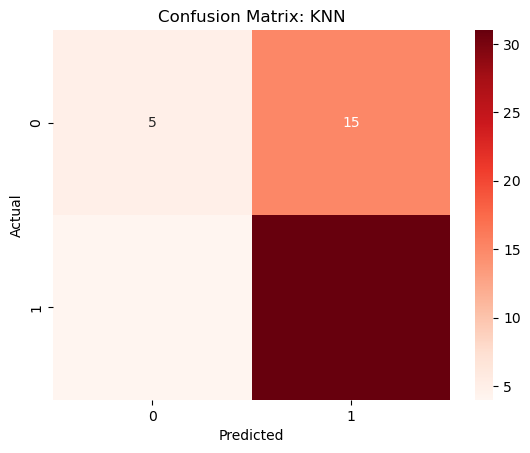

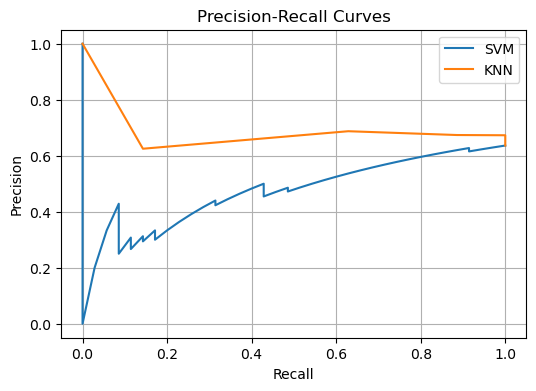

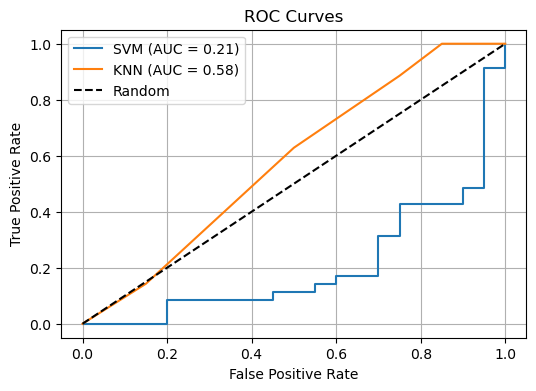

In [37]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve,
    roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Списки для накопления данных
roc_data = []
pr_data = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Для PR и ROC
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    pr_data.append((rec, prec, name))
    roc_data.append((fpr, tpr, auc, name))

# === PR CURVE ===
plt.figure(figsize=(6, 4))
for rec, prec, name in pr_data:
    plt.plot(rec, prec, label=name)
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# === ROC CURVE ===
plt.figure(figsize=(6, 4))
for fpr, tpr, auc, name in roc_data:
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#Вывод: На данном датасете наиболее эффективно себя показала модель логистической регрессии 